# Sentiment Analysis on Customer Feedback Data
This script analyzes customer feedback by applying sentiment analysis on the CustomerComments column in the dataset. The sentiment analysis determines whether customer feedback is positive, negative, or neutral. The analysis uses VADER's SentimentIntensityAnalyzer, and insights are visualized using bar plots.


# Objective
- Load customer feedback data from a CSV file.
- Process and classify customer comments into sentiment categories: Positive, Negative, and Neutral.
- Summarize sentiment data and visualize it using bar plots.

# Step-by-Step Code Explanation

# 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

- pandas: Used to load and manipulate datasets in tabular form.
- matplotlib.pyplot & seaborn: Used for data visualization to plot insights.
- nltk.sentiment.vader.SentimentIntensityAnalyzer: Pre-trained sentiment analysis model for classifying text into sentiment scores.

# 2. Load the Data

In [2]:
import pandas as pd

# Attempt to read the Excel file
try:
    df = pd.read_excel(r"C:\Users\rames\updated_telecom_customer_data (1).xlsx")
    print("Data loaded successfully!")
except Exception as e:
    print("Error loading data: ", e)

Data loaded successfully!


# Explanation:
- data_path: Path to the dataset file.
- delimiter=',': Specifies that the file uses commas as delimiters.
- on_bad_lines='skip': Ignores problematic rows that do not match expected formats to prevent the script from failing.
- encoding='utf-8': Ensures compatibility with UTF-8 encoded files.
- Error Handling: If any issue occurs while loading the file, an exception will print the error message.
# Why This Is Important:
Datasets can have missing values, encoding issues, or malformed rows. The try/except block ensures the script handles these gracefully.

# 3. Verify Data is Loaded Properly


In [3]:
# Check the first few rows to ensure data is loaded correctly
print("Dataset Head:\n", df.head())

Dataset Head:
    CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
0           1    Male              0      No        Yes      61   
1           2  Female              0      No         No      68   
2           3    Male              0      No         No      62   
3           4    Male              1     Yes         No       1   
4           5    Male              0     Yes        Yes      53   

  other PhoneService     MultipleLines InternetService       OnlineSecurity  \
0                Yes  No phone service             DSL                   No   
1                Yes                No     Fiber optic  No internet service   
2                 No               Yes              No  No internet service   
3                Yes                No     Fiber optic  No internet service   
4                Yes               Yes     Fiber optic                   No   

   ... DeviceProtection          TechSupport StreamingTV      StreamingMovies  \
0  ...              Yes   

- Displays the first 5 rows of the dataset to ensure that:
- The data is loaded successfully.
- Required fields like CustomerComments exist.

# 4. Ensure Required Column Exists

In [4]:
if 'CustomerComments' not in df.columns:
    raise ValueError("CustomerComments column not found in the dataset")

# Explanation:
- Before proceeding, ensure the presence of the CustomerComments column in the loaded data.
- If it is missing, the script stops execution to prevent errors during sentiment analysis.

# 5. Initialize Sentiment Analysis Tool

In [5]:
analyzer = SentimentIntensityAnalyzer()

# VADER Sentiment Analysis:
- A pre-trained NLP model from the nltk library.
- Converts customer feedback into sentiment scores (-1 to 1).
- Positive values indicate positive sentiment, negative values indicate negative sentiment, and values close to zero imply neutrality.

# 6. Define Sentiment Analysis Logic

In [6]:
def get_sentiment_score(comment):
    """
    Analyze sentiment for a given comment using VADER SentimentIntensityAnalyzer
    Returns:
    - 'Positive' for positive sentiment
    - 'Negative' for negative sentiment
    - 'Neutral' for neutral sentiment
    """
    # Check if comment is a valid string
    if not isinstance(comment, str):
        return 'Neutral'  # Handle missing or invalid text input

    # Get sentiment scores from VADER
    sentiment_score = analyzer.polarity_scores(comment)['compound']

    # Classify into Positive, Negative, or Neutral based on compound score
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


# Explanation:
#Input Validation:
- Checks if comment is a string.
- If invalid or missing, classify it as 'Neutral'.
# Sentiment Scoring:
- analyzer.polarity_scores(comment)['compound']: Returns a sentiment score between -1 and 1.
- Positive values → Positive sentiment.
- Negative values → Negative sentiment.
- Near zero → Neutral sentiment.
# Classification Logic:
# Sentiment is categorized based on thresholds:
- >= 0.05: Positive sentiment.
- <= -0.05: Negative sentiment.
- Else → Neutral sentiment.

# 7. Apply Sentiment Classification to Data


In [10]:
df['Sentiment'] = df['CustomerComments'].apply(get_sentiment_score)
df['Sentiment']

0       Negative
1       Negative
2       Negative
3       Negative
4        Neutral
          ...   
4995     Neutral
4996    Negative
4997    Positive
4998    Negative
4999    Positive
Name: Sentiment, Length: 5000, dtype: object

# Explanation:
- Apply the get_sentiment_score function to each row in the CustomerComments column.
- This adds a new column Sentiment to the DataFrame, classifying each comment as Positive, Negative, or Neutral.

# 8. Summarize Sentiment Counts

In [8]:
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

Sentiment counts:
 Sentiment
Positive    2526
Negative    1989
Neutral      485
Name: count, dtype: int64


- Summarizes how many customer comments fall into each sentiment category.
- value_counts() calculates the counts of unique values in the Sentiment column.


# 9. Visualize Sentiment Distribution

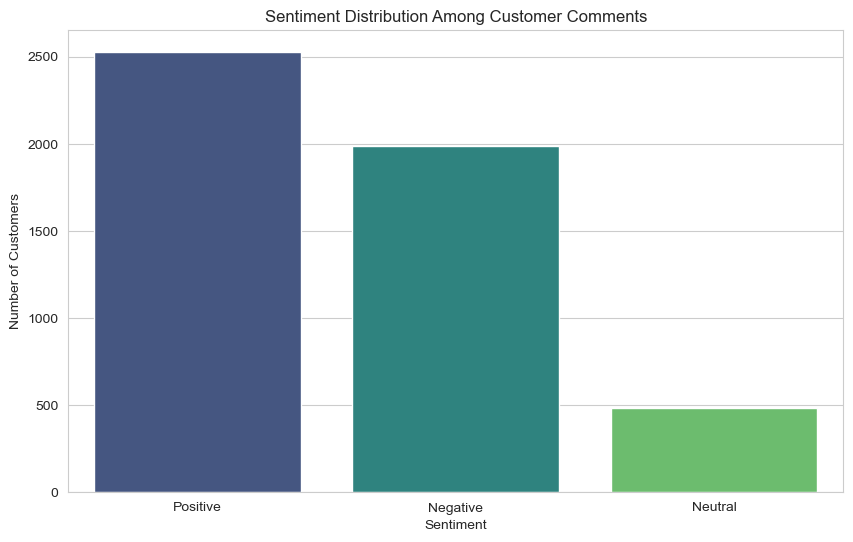

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution Among Customer Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Customers")
plt.show()


# CONCLUSION
## Key Insights from the Graph
### 1. Positive Sentiments
### Observation:
- The Positive sentiment bar is the tallest, indicating that a majority of customers expressed positive feedback.
- The number of customers with positive sentiment is around 2500.
### Insight:
- Many customers are satisfied with the service, highlighting strong areas in customer satisfaction.
### 2. Negative Sentiments
### Observation:
- The Negative sentiment bar is the second tallest.
- The number of customers with a negative sentiment is close to 2000.
### Insight:
- While many customers are satisfied, there is a substantial number of dissatisfied customers.
- Areas contributing to negative sentiment could include issues with billing, technical problems, customer service, or service interruptions.
### 3. Neutral Sentiments
### Observation:
- The Neutral sentiment bar is the shortest, with around 500 customers expressing neutral feedback.
### Insight:
- Neutral sentiment indicates indifference or a lack of strong opinions from customers. This could represent customers who are neither actively dissatisfied nor particularly impressed.
- General Trend Analysis


# From the bar chart:
### Dominance of Positive Sentiments:
- A significant number of customers have expressed satisfaction. This is a good indicator of areas where customer experience initiatives are working well.
### Significant Negative Sentiments:
- Despite the positive sentiments, the high number of customers expressing dissatisfaction suggests that addressing the root causes (e.g., customer service, technical issues, network problems, payment options) could improve customer retention.
### Neutral Sentiments:
- The small neutral customer base represents an opportunity. Strategies could target these individuals to convert their sentiment to positive by improving engagement, offering personalized solutions, or solving latent customer concerns.